# TASK #1: UNDERSTAND THE PROBLEM STATEMENT AND BUSINESS CASE


<table>
  <tr><td>
    <img src="https://drive.google.com/uc?id=15eGnAbma5Q_j9CZZKi46Gh3-EpgSWYOV"
         alt="Fashion MNIST sprite"  width="1000">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1. Classifying disease using Deep Learning
  </td></tr>
</table>


![alt text](https://drive.google.com/uc?id=19BuQ5m0xZWC7vQN4jX9lukmJ4aE0EkL8)

![alt text](https://drive.google.com/uc?id=10tbeSkGZ0xdHtqTGhYwHhb9PPURw0BfD)

# TASK #2: IMPORT LIBRARIES AND DATASET

In [28]:
# This is a custom dataset that contains covid-19 x-ray images, viral pneumonia x-ray images, bacterial pneumonia x-ray iamges and normal person x-ray images.
# Each class contains 133 images.
# Dataset Source:
# https://github.com/ieee8023/covid-chestxray-dataset
# https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia


import os
import cv2
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers, optimizers
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [29]:
# You will need to mount your drive using the following commands:
# For more information regarding mounting, please check this out: https://stackoverflow.com/questions/46986398/import-data-into-google-colaboratory

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
# Specify training data directory
X_ray_Directory="/content/drive/MyDrive/DataScienceforBusiness/OperationsDepartment/Dataset"

In [31]:
# List the folders in the directory
os.listdir(X_ray_Directory)

['2', '0', '3', '1']

In [32]:
# Use image generator to generate tensor images data and normalize them
# Use 20% of the data for cross-validation
imge_generator=ImageDataGenerator(rescale=1./255,validation_split=0.2)


In [33]:
# Generate batches of 40 images
# Total number of images is 133*4 = 532 images
# Training is 428 (80%) and validation is 104 (20%)
# Perform shuffling and image resizing

train_generator=imge_generator.flow_from_directory(batch_size=40, directory=X_ray_Directory, shuffle=True,target_size=(256,256),class_mode='categorical', subset='training')


Found 428 images belonging to 4 classes.


In [34]:
validate_generator=imge_generator.flow_from_directory(batch_size=40, directory=X_ray_Directory, shuffle=True,target_size=(256,256),class_mode='categorical', subset='validation')


Found 104 images belonging to 4 classes.


In [35]:
# Generate a batch of 40 images and labels
train_image, train_labels=next(train_generator)

In [36]:
train_image.shape

(40, 256, 256, 3)

In [37]:
train_labels.shape

(40, 4)

In [38]:
train_labels


array([[0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]],

In [39]:
# labels Translator
label_names={0:'Covid-19',1:'Normal',2:'Viral Pneumonia',3:'Bacterial Pneumonia'}

# TASK #3: VISUALIZE DATASET

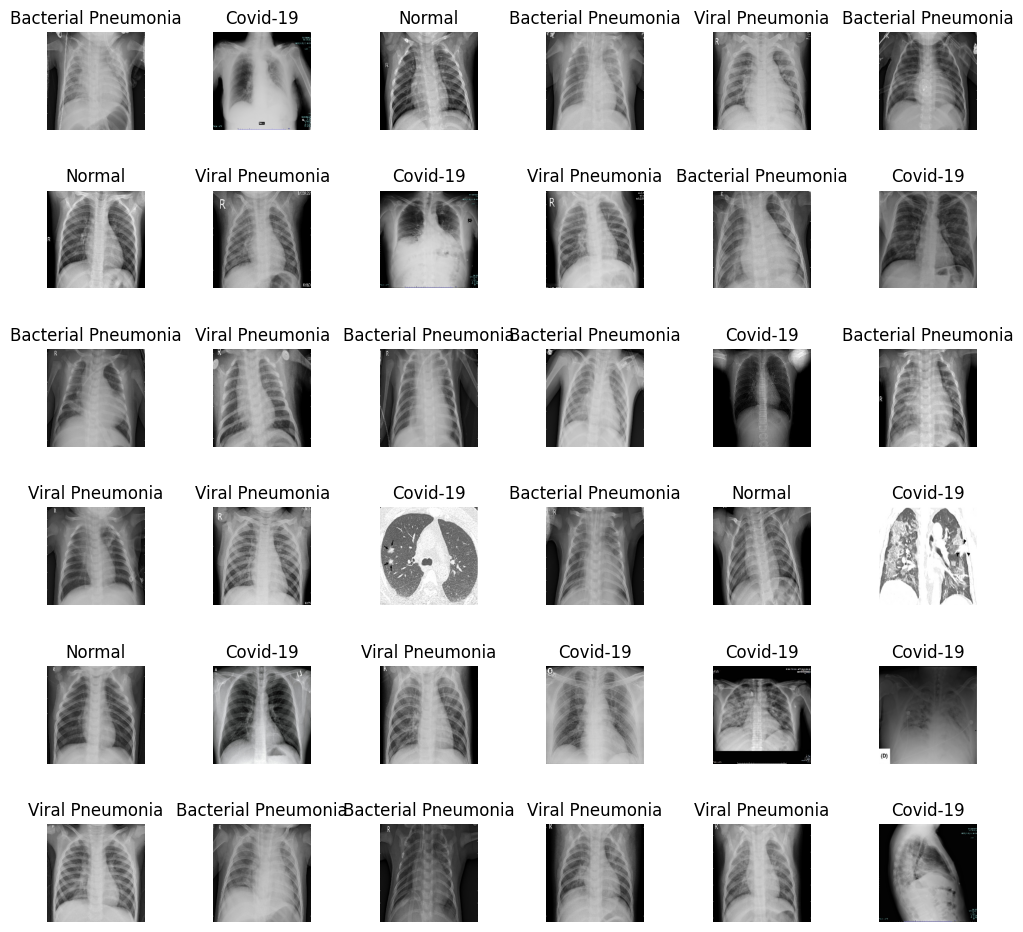

In [40]:
L=6
W=6
fig, axes=plt.subplots(L,W,figsize=(12,12))
axes=axes.ravel()
for i in np.arange(0,L * W):
  axes[i].imshow(train_image[i])
  axes[i].set_title(label_names[np.argmax(train_labels[i])])
  axes[i].axis('off')
plt.subplots_adjust(wspace=0.7)








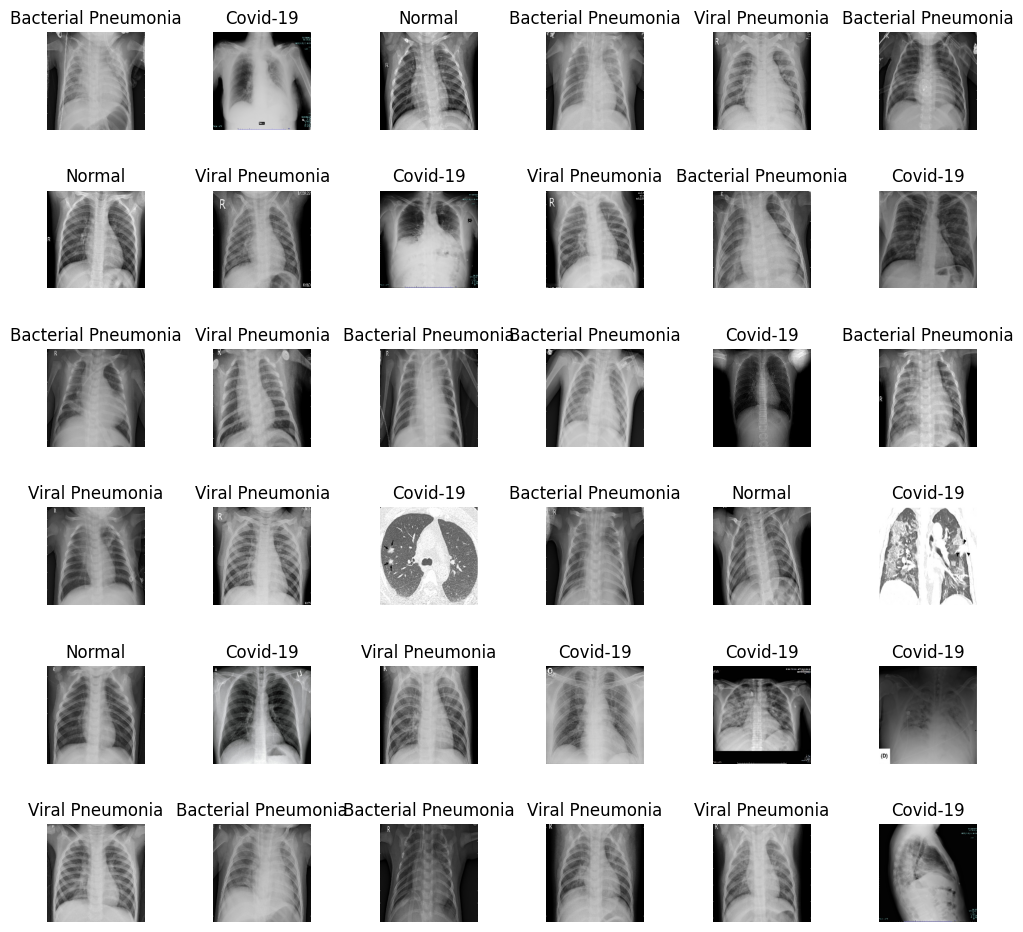

In [41]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming train_image and train_labels are defined elsewhere in your code
# and label_names is the list of label names.

L = 6
W = 6
fig, axes = plt.subplots(L, W, figsize=(12, 12))
axes = axes.ravel()

for i in np.arange(0, L * W):
    axes[i].imshow(train_image[i])
    axes[i].set_title(label_names[np.argmax(train_labels[i])])
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.7)
plt.show()


# TASK #4: UNDERSTAND THE THEORY AND INTUITION BEHIND CONVOLUTIONAL NEURAL NETWORKS

![alt text](https://drive.google.com/uc?id=176TJGdJtNZmX4J5QyeI8W_YS5f1gg5VS)

![alt text](https://drive.google.com/uc?id=1340UvqbXc-sy6cIuVg7ZbOwcga2JxfkP)

![alt text](https://drive.google.com/uc?id=1hngDlUf9JnwUhPII-Ah7KTtcvoeTI9m8)

![alt text](https://drive.google.com/uc?id=1nt8iX7H2LEhaWgGCi_NIb05DMQEoJVfI)

# TASK #5: UNDERSTAND THE THEORY AND INTUITION BEHIND TRANSFER LEARNING

![alt text](https://drive.google.com/uc?id=1Wnti2DSmA2qMRsgkD7Z_MJkmed0bJZTN)

![alt text](https://drive.google.com/uc?id=1Chdq0gdnHGYDDb50pMMtcTOZMr0u37Iz)

![alt text](https://drive.google.com/uc?id=14niGb232X6l8OD1dMT4a_u3fjh_jKuMS)

![alt text](https://drive.google.com/uc?id=1dye4zWALCDu8a1a-58HfZk4On4nVuizV)

# TASK #6: IMPORT MODEL WITH PRETRAINED WEIGHTS

In [42]:
basemodel=ResNet50(weights='imagenet',include_top=False,input_tensor=Input(shape=(256,256,3)))

In [19]:
basemodel.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 262, 262, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 128, 128, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 128, 128, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                       

In [21]:
# freezing layers in the model
for layers in basemodel.layers[:-10]:
  layers.trainable=False

# TASK #7: BUILD AND TRAIN DEEP LEARNING MODEL

In [22]:
headmodel = basemodel.output
headmodel = AveragePooling2D(pool_size = (4,4))(headmodel)
headmodel = Flatten(name= 'flatten')(headmodel)
headmodel = Dense(256, activation = "relu")(headmodel)
headmodel = Dropout(0.3)(headmodel)
headmodel = Dense(128, activation = "relu")(headmodel)
headmodel = Dropout(0.2)(headmodel)
headmodel = Dense(4, activation = 'softmax')(headmodel)

model = Model(inputs = basemodel.input, outputs = headmodel)

In [25]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import RMSprop
from keras.optimizers.schedules import ExponentialDecay

# Create a learning rate schedule
lr_schedule = ExponentialDecay(
    initial_learning_rate=1e-4,
    decay_steps=100000,
    decay_rate=0.96,
    staircase=True
)

# Create an optimizer with the learning rate schedule
optimizer = RMSprop(learning_rate=lr_schedule)

# Compile the model




model.compile(loss = 'categorical_crossentropy', optimizer=optimizer, metrics= ["accuracy"])







In [26]:
# using early stopping to exit training if validation loss is not decreasing even after certain epochs (patience)
earlystopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)

# save the best model with lower validation loss
checkpointer = ModelCheckpoint(filepath="weights.hdf5", verbose=1, save_best_only=True)

In [45]:
train_generator = imge_generator.flow_from_directory(batch_size = 4, directory= X_ray_Directory, shuffle= True, target_size=(256,256), class_mode= 'categorical', subset="training")
val_generator = imge_generator.flow_from_directory(batch_size = 4, directory= X_ray_Directory, shuffle= True, target_size=(256,256), class_mode= 'categorical', subset="validation")

Found 428 images belonging to 4 classes.
Found 104 images belonging to 4 classes.


In [49]:
history = model.fit_generator(train_generator, steps_per_epoch= train_generator.n // 4, epochs = 25, validation_data= val_generator, validation_steps= val_generator.n // 4, callbacks=[checkpointer, earlystopping])

<ipython-input-49-6c941baded7b>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator, steps_per_epoch= train_generator.n // 4, epochs = 25, validation_data= val_generator, validation_steps= val_generator.n // 4, callbacks=[checkpointer, earlystopping])


Epoch 1/25
107/107 [==============================] - ETA: 0s - loss: 0.3459 - accuracy: 0.8879
Epoch 1: val_loss did not improve from 0.62971
107/107 [==============================] - 192s 2s/step - loss: 0.3459 - accuracy: 0.8879 - val_loss: 0.8524 - val_accuracy: 0.7212
Epoch 2/25
107/107 [==============================] - ETA: 0s - loss: 0.2770 - accuracy: 0.8995
Epoch 2: val_loss did not improve from 0.62971
107/107 [==============================] - 172s 2s/step - loss: 0.2770 - accuracy: 0.8995 - val_loss: 2.4146 - val_accuracy: 0.6346
Epoch 3/25
107/107 [==============================] - ETA: 0s - loss: 0.3682 - accuracy: 0.8902
Epoch 3: val_loss improved from 0.62971 to 0.56999, saving model to weights.hdf5
107/107 [==============================] - 159s 1s/step - loss: 0.3682 - accuracy: 0.8902 - val_loss: 0.5700 - val_accuracy: 0.8365
Epoch 4/25
107/107 [==============================] - ETA: 0s - loss: 0.3073 - accuracy: 0.8855
Epoch 4: val_loss did not improve from 0.5699

# TASK #8: EVALUATE TRAINED DEEP LEARNING MODEL

In [50]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

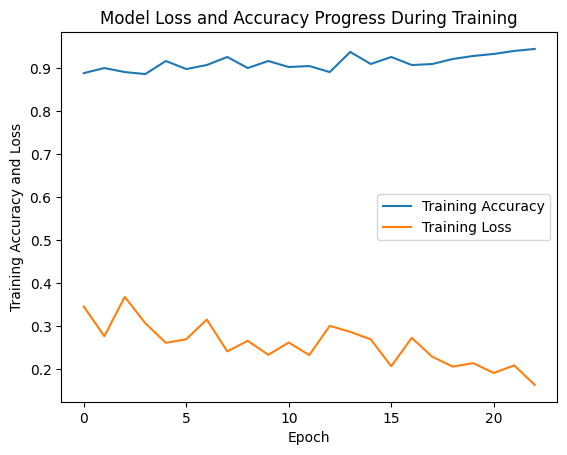

In [51]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])

plt.title('Model Loss and Accuracy Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Accuracy and Loss')
plt.legend(['Training Accuracy', 'Training Loss'])

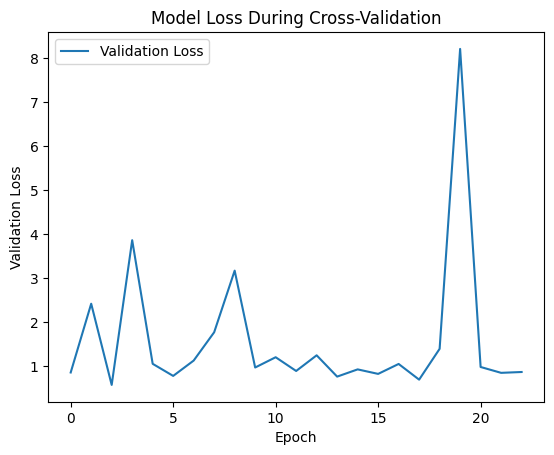

In [52]:
plt.plot(history.history['val_loss'])
plt.title('Model Loss During Cross-Validation')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.legend(['Validation Loss'])

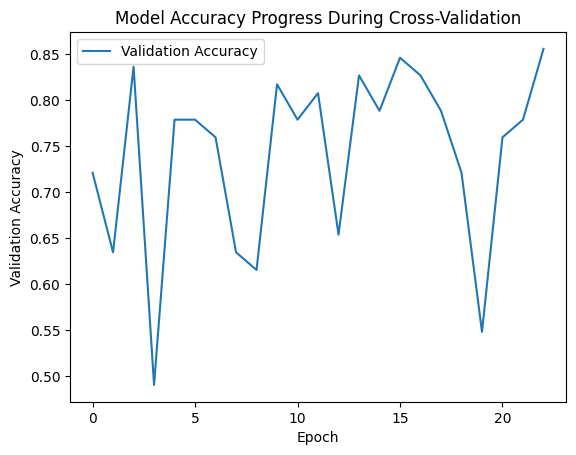

In [53]:
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy Progress During Cross-Validation')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.legend(['Validation Accuracy'])

In [56]:
test_directory = '/content/drive/MyDrive/DataScienceforBusiness/OperationsDepartment/Test'


In [57]:
test_gen = ImageDataGenerator(rescale = 1./255)

test_generator = test_gen.flow_from_directory(batch_size = 40, directory= test_directory, shuffle= True, target_size=(256,256), class_mode= 'categorical')

evaluate = model.evaluate_generator(test_generator, steps = test_generator.n // 4, verbose =1)

print('Accuracy Test : {}'.format(evaluate[1]))

Found 40 images belonging to 4 classes.


<ipython-input-57-15440cd26711>:5: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  evaluate = model.evaluate_generator(test_generator, steps = test_generator.n // 4, verbose =1)


 1/10 [==>...........................] - ETA: 1:56 - loss: 2.0184 - accuracy: 0.7250

10/10 [==============================] - 13s 15ms/step - loss: 2.0184 - accuracy: 0.7250
Accuracy Test : 0.7250000238418579


In [60]:
os.listdir(test_directory)

['.DS_Store', '2', '1', '3', '0']

In [61]:
import os
import cv2
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

prediction = []
original = []
image = []

# Ensure test_directory exists and list all directories inside it
if os.path.exists(test_directory):
    class_directories = [d for d in os.listdir(test_directory) if os.path.isdir(os.path.join(test_directory, d))]
else:
    raise FileNotFoundError(f"The directory {test_directory} does not exist.")

for class_dir in class_directories:
    class_path = os.path.join(test_directory, class_dir)
    if os.path.exists(class_path):
        for item in os.listdir(class_path):
            img_path = os.path.join(class_path, item)
            if os.path.isfile(img_path):
                img = cv2.imread(img_path)
                img = cv2.resize(img, (256, 256))
                image.append(img)
                img = img / 255.0
                img = img.reshape(-1, 256, 256, 3)
                predict = model.predict(img)
                predict = np.argmax(predict)
                prediction.append(predict)
                original.append(int(class_dir))  # Convert class_dir to an integer if applicable

# Now you can calculate the metrics
conf_matrix = confusion_matrix(original, prediction)
class_report = classification_report(original, prediction)
accuracy = accuracy_score(original, prediction)

print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("Accuracy:", accuracy)


1/1 [==============================] - 0s 252ms/step
Confusion Matrix:
 [[10  0  0  0]
 [ 0  8  0  2]
 [ 1  3  5  1]
 [ 2  1  1  6]]
Classification Report:
               precision    recall  f1-score   support

           0       0.77      1.00      0.87        10
           1       0.67      0.80      0.73        10
           2       0.83      0.50      0.62        10
           3       0.67      0.60      0.63        10

    accuracy                           0.73        40
   macro avg       0.73      0.72      0.71        40
weighted avg       0.73      0.72      0.71        40

Accuracy: 0.725


In [62]:
len(original)

40

In [63]:
score = accuracy_score(original,prediction)
print("Test Accuracy : {}".format(score))

Test Accuracy : 0.725


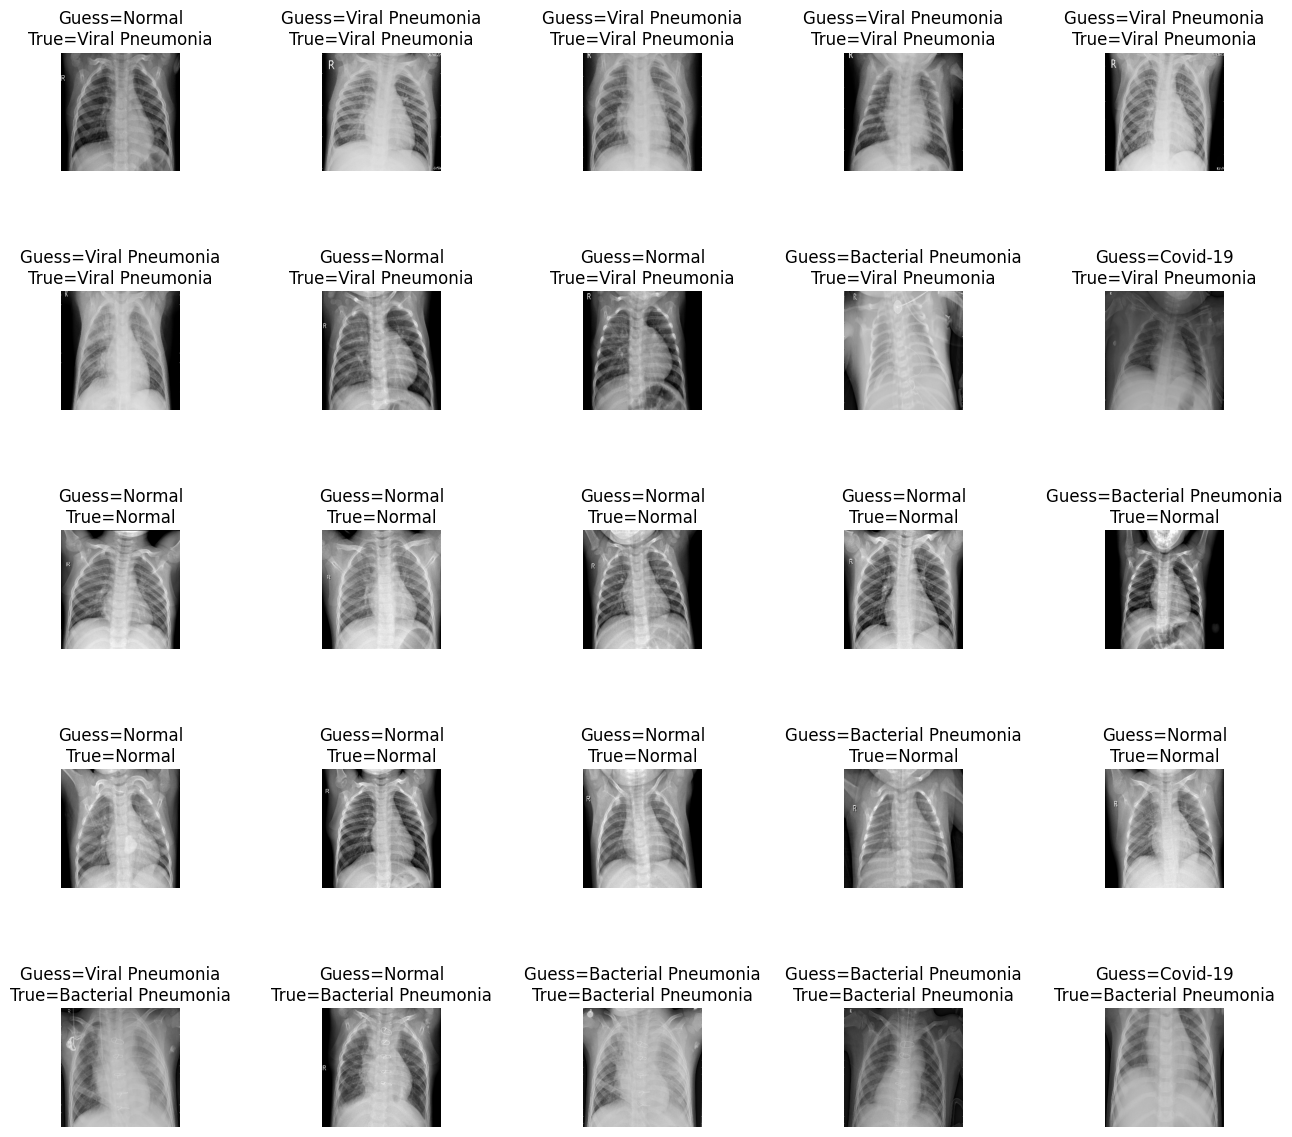

In [66]:
L = 5
W = 5

fig, axes = plt.subplots(L, W, figsize = (15,15))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(image[i])
    axes[i].set_title('Guess={}\nTrue={}'.format(str(label_names[prediction[i]]), str(label_names[original[i]])))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1.2)

In [67]:
print(classification_report(np.asarray(original), np.asarray(prediction)))

              precision    recall  f1-score   support

           0       0.77      1.00      0.87        10
           1       0.67      0.80      0.73        10
           2       0.83      0.50      0.62        10
           3       0.67      0.60      0.63        10

    accuracy                           0.73        40
   macro avg       0.73      0.72      0.71        40
weighted avg       0.73      0.72      0.71        40



Text(0.5, 1.0, 'Confusion_matrix')

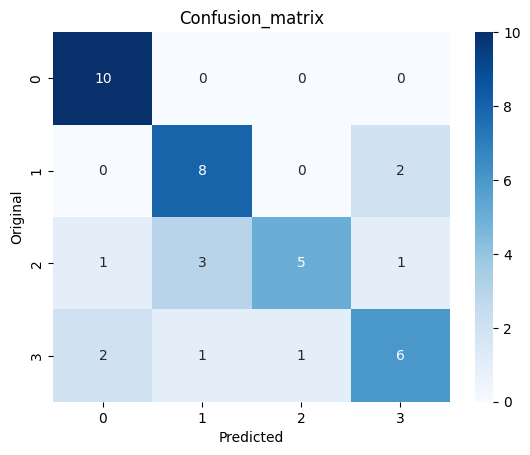

In [68]:
cm = confusion_matrix(np.asarray(original), np.asarray(prediction))
ax = plt.subplot()
sns.heatmap(cm, annot = True, ax = ax, cmap='Blues')

ax.set_xlabel('Predicted')
ax.set_ylabel('Original')
ax.set_title('Confusion_matrix')